In [1]:
%matplotlib notebook 

*(Note: `%matplotlib notebook` allows for fancier interactivity in plots than `%matplot inline`.*

# 592B, Class 1.2. Reading in WAV files and plotting them, Fourier series

This will be the jupyter notebook for today's class. To get any updates I make to it after you clone this, do a

```bash
git pull
```

command to get the latest version. That probably shouldn't create any merge conflicts, but if it does, then you'll have a chance to practice your version control skills!

## Miscellaneous tips
To comment a region of code, highlight it and press: 
- PCs: `Ctrl` + `/`
- Macs: `Cmd` + `/`

---

Let's get some practice with reading and writing WAV files in python. We'll be working with a sample audio file called `hmong_m6_24_c.wav` in the `rms-sample-sounds` sub-directory in this repository. This is an audio file I recorded from a native speaker of White Hmong in Fresno, California some years ago.

We'll be using functions from `scipy.io.wavefile`:
- [*scipy.io.wavefile.read*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read) reads in a WAV file as a NumPy array (and also returns the sampling rate).
- [*scipy.io.wavefile.write*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html) writes a NumPy array as a WAV file, given a sampling rate and a filename. 
You'll play with this in your homework for this week.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io.wavfile as wavfile 

# As far as I know, scipy.io.wavfile only can handle mono files, and not stereo ones. 
# The "wave" library can handle stereo

#help(wavfile.read) # uncomment to look at help file for scipy.io.wavfile


## Reading in a WAV file and listening to it

Let's read-in a WAV file using `scipy.io.wavfile.read`.

In [3]:
# From https://stackoverflow.com/questions/18644166/how-to-manipulate-wav-file-data-in-python
fs, hmong_data = wavfile.read('rms-sample-sounds/hmong_m6_24_c.wav')
print(fs) # print retu


type(hmong_data)
#getattr(hmong_data)

22050


numpy.ndarray

What kind of data type is `hmong_data`? Let's check!

In [4]:
type(hmong_data)

numpy.ndarray

It's an [n-dimensional NumPy array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html). If you go to the documentation page, you can see what `ndarray`'s [attributes](http://greenteapress.com/thinkpython2/html/thinkpython2016.html#sec179) are. 

In [5]:
print(hmong_data.dtype) # data type
print(hmong_data.ndim) # number of dimensions
print(hmong_data.size) # number of elements in array

int16
1
35015


So, `hmong_data` is a 1-D NumPy array with 35015 elements, which are of [data type](https://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) `int16`. 

The data type `int16` stands for "integer (-32768 to 32767)".

***In-class exercise: `16` in `int16` stands for 16-bit. 
Does that fit with the number of amplitude values contained in the range (-32768 to 32767)? Work this out in the cell below.***

Now that we've read in `hmong_m6_24_c.wav`, we can also use our `IPython.display.Audio` command from Class 1.2 to play the sound.

In [6]:
from IPython.display import Audio

Audio(data=hmong_data, rate=fs)

But we might also like to do more with the audio data than just listen to it! And we can do more, since it's been read in as a NumPy array.

## Plotting an audio file waveform

First, let's plot the first $n$ samples of the audio signal. Here let $n=4096$ samples. (What's going on at the beginning of the audio file---why is it flat?) 



<IPython.core.display.Javascript object>


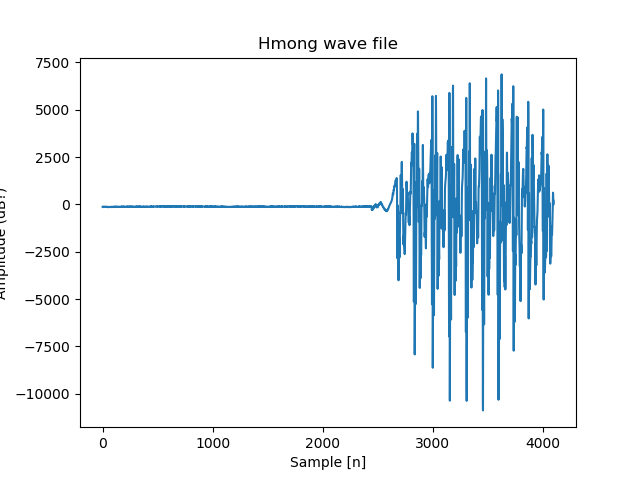

Text(0.5,1,'Hmong wave file')

In [7]:
#https://stackoverflow.com/a/25095962

n = 4096 # number of samples to plot

# Set up a new figure
plt.figure("hmong")

# plot the first n samples
plt.plot(hmong_data[0:n])
# label the axes
plt.ylabel("Amplitude (dB?)")
plt.xlabel("Time(s)")
# set the title  
plt.title("Hmong wave file")


You might be wondering what units the amplitude is in. Remember, these are digitized signals, so this is dependent on the bit depth of the recording--and you already know what that is from `hmong_data.dtype`. In your homework for this week, you'll familiarize yourself with **standardizing** or **normalizing** the amplitude, e.g., into the range -1 to 1, like you see in Praat's display of the waveform. 

You might have also noticed a problem with the x-axis: that's not really time on the x-axis is it? That's the sample number! 

So we really should re-label the x-axis as in samples, not in time. 


In [8]:
plt.xlabel("Sample [n]") # This will change the x-axis in the plot above

Text(0.5,0,'Sample [n]')

We can also convert from samples to time on the x-axis, e.g., in seconds.

***In-class exercise: Plot the first second of the Hmong audio file, with a real time axis, i.e., time should be in seconds, not in samples. Hint: knowing the sampling rate will help you do this! I put a cell below for you to get started.***

***And if you finish that, can you also write a function that will plot the audio file from some start time `t_start` to some stop time `t_stop`?***

In your homework for this week, you'll also get practice **resampling** the audio using [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html) (and maybe `by hand'!) and writing it to a WAV file.

## Adding up sine waves: towards Fourier series

Let's take the two sinusoidal signals we worked on last week and in your homework and try adding them up.


In [9]:
fs = 44100 # define the sampling rate, f_s = 100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  10 # We stop sampling at t = 10s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)


f1 = 440 # frequency of y_1(t)
f2 = 220 # frequency of y_2(t)

y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

y1_plus_y2 = y1+y2


<IPython.core.display.Javascript object>


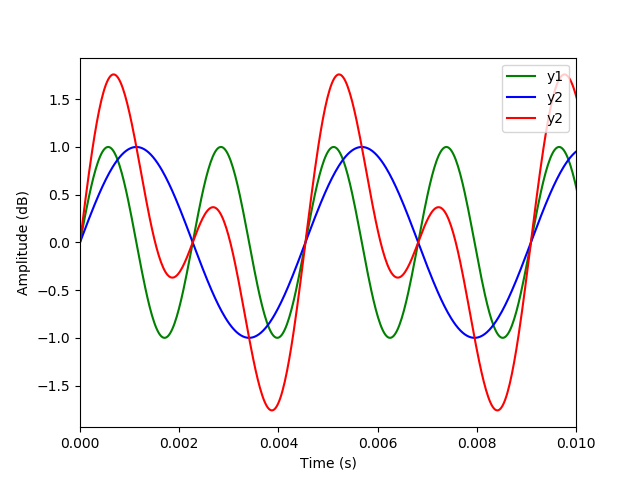

Text(0,0.5,'Amplitude (dB)')

In [10]:
plt.figure("Adding up sines") # Create a new figure

plt.xlim(0,0.01)
plt.plot(x , y1, "-g", label="y1") # plot (x,y1) as a green line
plt.plot(x , y2, "-b", label="y2") # plot (x,y2) as a blue line
plt.plot(x , y1_plus_y2, "-r", label="y2") # plot (x,y2) as a blue line


#plt.stem(x,y1, 'r', )
plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

You should play with setting other parameters! Remember, you can listen to your generated sinusoids too, using `Audio`.

## A first look at Fourier series

Let's look at another set of sinusoids, this time:

Recall from last week that a standard definition of a sinusoidal signal (i.e., a sine wave) is given as function of time $t$:

$$y(t) = A \sin (\omega t + \phi) $$

where:
- $A$ is the amplitude
- $\omega$ is the angular frequency, n.b., $\omega = 2\pi f$ (where $f$ is the frequency in cycles per second (Hertz or Hz))
- $\phi$ is the phase shift 

Now let's define a set of sinusoids. We'll call this a **Fourier basis set** for reasons we'll go over on Thursday.

$$y_1(t) = \sin \left(\pi t\right) $$
$$y_2(t) = \sin \left(2\pi t\right) $$
$$y_3(t) = \sin \left(3\pi t\right) $$
$$y_4(t) = \sin \left(3\pi t\right) $$

***In-class exercise: Define these four sinusoids as signals with a sampling rate of 22050 Hz. What is the frequency of each of these periodic signals? Plot them in the same way as in the previous plot to see what happens when you add them up. Look at four different plots, and create a different figure for each plot. And listen to the resulting signals!***
1. $y_1(t)$
2. $y_1(t)+y_2(t)$
3. $y_1(t)+y_2(t)+y_3(t)$
4. $y_1(t)+y_2(t)+y_3(t)+y_4(t)$   

***I've put a cell below to get you started.***